In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
#Reading Train And Test DataSet
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploratory Data Analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


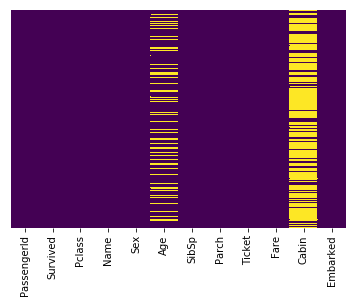

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that there are a lot of missing values in Cabin feature and relatively less no of missing values in Age feature.

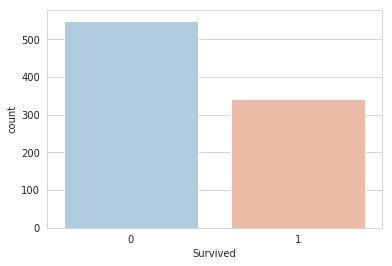

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

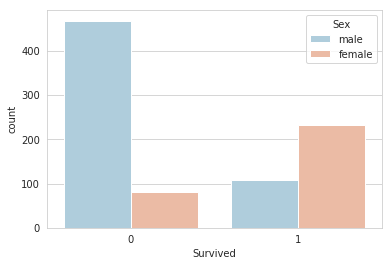

In [8]:
#Survived Male Vs Female
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

There are Relatively very large no of Male died in Titanic Accident.
Maybe they are following Female First method for transferring on Survival Boat.

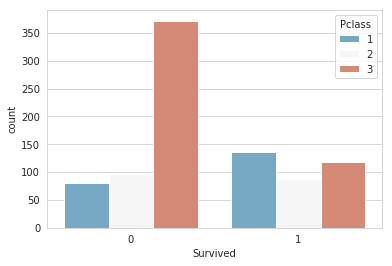

In [9]:
#Survived Class Of Traveller
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

/home/vishal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


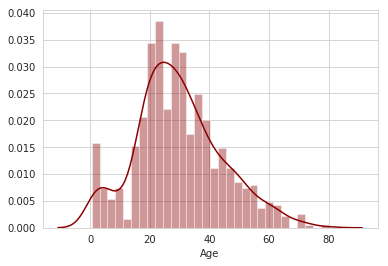

In [10]:
sns.distplot(train['Age'].dropna(),color='darkred',bins=30)

The distribution is slightly Right Skewed.There isn't much problem of Outliers.They aren't effecting our data much.

/home/vishal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


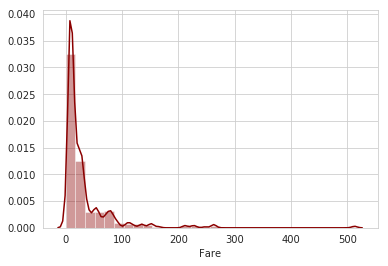

In [11]:
sns.distplot(train['Fare'].dropna(),color='darkred',bins=30)

The fare feature is Right skewed which tells us that it is highly effected by Outliers and isn't much helpful for us.

## Data Cleaning

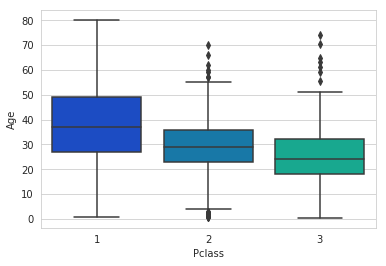

In [13]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The persons travelling in 1st Class are tend to be older in age and person travelling in 3rd class are tend to be younger in age which somewhat makes sense.
So we'll be imputing Age values according to the class.

In [14]:
def imput_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age
    

In [15]:
train['Age']=train[['Age','Pclass']].apply(imput_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(imput_age,axis=1)

In [16]:
#Imputing Missing Cabin Value With 0 And 1
def impute_cabin(col):
    Cabin=col[0]
    if type(Cabin)== str:
        return 1
    else:
        return 0

In [17]:
train['Cabin']=train[['Cabin']].apply(impute_cabin,axis=1)
test['Cabin']=test[['Cabin']].apply(impute_cabin,axis=1)

In [18]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [19]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [20]:
#Filling Missing Fare With Mean And Dropping Embarked Rows With Missing Values
test['Fare'].fillna((test['Fare'].mean()),inplace=True)
train.dropna(inplace=True)

In [21]:
#Copying Our Dataset For Further Operations 
datatr=train
datate=test

In [22]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


There are some categorical features like Sex,Embarked which we need to convert into numerical feature by using dummies variable so that our Machine Learning Model can directly take as input for its training. 

In [23]:
#Converting Categorical features into numerical features using dummy Variable
sextr = pd.get_dummies(datatr['Sex'],drop_first=True)
embarktr = pd.get_dummies(datatr['Embarked'],drop_first=True)
sexte = pd.get_dummies(datate['Sex'],drop_first=True)
embarkte = pd.get_dummies(datate['Embarked'],drop_first=True)
datatr=pd.concat([datatr,sextr,embarktr],axis=1)
datate=pd.concat([datate,sexte,embarkte],axis=1)

In [24]:
datatr.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1,0,1


In [25]:
#Droping Unwanted feature And Duplicate feature from our dataset
datatr=datatr.drop(['Sex','Embarked','Name','Ticket'],axis=1)
datate=datate.drop(['Sex','Embarked','Name','Ticket'],axis=1)
datatr.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


## Modelling

In [26]:
# Splitting train and test data for validation
from sklearn.model_selection import train_test_split

predictors = datatr.drop(['Survived','PassengerId'],axis=1)

target = datatr['Survived']

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [28]:
# Importing Different Classifier from SkLearn Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [29]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
accu=accuracy_score(y_val,y_pred)
print(accu)

0.7346938775510204


/home/vishal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_val)
accu=accuracy_score(y_val,y_pred)
print(accu)

0.6887755102040817


In [31]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_val)
accu=accuracy_score(y_val,y_pred)
print(accu)

0.75


In [32]:
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_val)
accu=accuracy_score(y_val,y_pred)
print(accu)

0.6581632653061225


/home/vishal/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)
y_pred=rand.predict(x_val)
accu=accuracy_score(y_val,y_pred)
print(accu)

0.7857142857142857


/home/vishal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_val)
accu=accuracy_score(y_val,y_pred)
print(accu)

0.7704081632653061


Random Forest Classifier is giving the Best Accuracy of About 77% which isn't bad i would say.

## Exporting Submission File

In [35]:
ids=datate['PassengerId']
final=rand.predict(datate.drop('PassengerId',axis=1))


In [36]:
Output=pd.DataFrame({'PassengerId' : ids , 'Survived' : final})
Output.to_csv('Submission.csv' ,  index = False)

In [37]:
sub=pd.read_csv('Submission.csv')
sub.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
